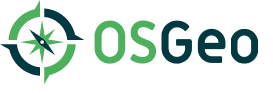

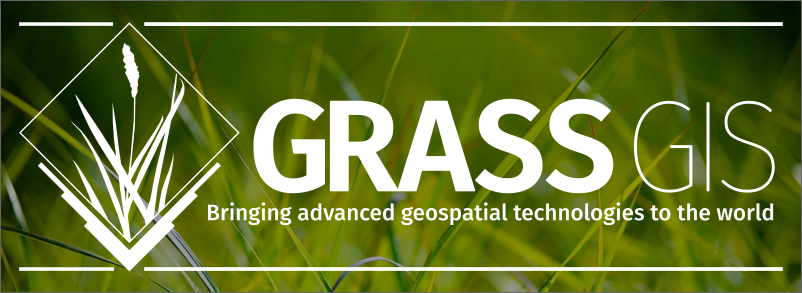

# Start up
Find GRASS GIS Python packages first, import them, and then initialize GRASS GIS session:

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

In [1]:
# Import Python standard library and IPython packages we need.
import os
import subprocess
import sys
from IPython.display import Image

In [ ]:
#os.getcwd()

In [2]:
subprocess.run(["grass", "--config", "python_path"], text=True)

/home/jovyan/grass/dist.x86_64-pc-linux-gnu/etc/python


CompletedProcess(args=['grass', '--config', 'python_path'], returncode=0)

In [3]:
# Ask GRASS GIS where its Python packages are.
sys.path.append('/home/jovyan/grass/dist.x86_64-pc-linux-gnu/etc/python')

In [4]:
sys.path

['/home/jovyan',
 '/srv/conda/envs/notebook/lib/python310.zip',
 '/srv/conda/envs/notebook/lib/python3.10',
 '/srv/conda/envs/notebook/lib/python3.10/lib-dynload',
 '',
 '/srv/conda/envs/notebook/lib/python3.10/site-packages',
 '/home/jovyan/grass/dist.x86_64-pc-linux-gnu/etc/python']

In [5]:
# Import the GRASS GIS packages needed.
import grass.script as gs
import grass.jupyter as gj

In [6]:
# Start GRASS Session
session = gj.init("/home/jovyan/data/", "testLocation", "PERMANENT")
print(session)

In [7]:
# Set working location of data
os.chdir('/home/jovyan/data/testLocation')
print(os.getcwd())

/home/jovyan/data/testLocation


<span style="font-family:Dubai; color:#555555; font-size:17px;">

Create map instance

In [8]:
# Create map instance
smap = gj.Map() #this for displaying it in this here notebook

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Tell OS that we want to use a renderer called cairo

In [9]:
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'

# Import yield data

<span style="font-family:Dubai; color:#555555; font-size:17px;">
    
## 1st GRASS SCRIPT!  
<li>import a vector
<li>from a file called "name"
<li>with Coordinate Reference System code ####
<li>call our map "thisname_map"
<li>Override projection check (use current location's projection). Assume that the dataset has the same projection as the current location

In [ ]:
# Import data
#gs.run_command("v.import", input="EX1.shp", epsg="4326", output="ex1_map", flags="o")

In [48]:
# Import data
gs.run_command("v.import", input="RAW-DATA.csv", epsg="4326", output="sampmap1", flags="o") #wtf@epsg on a csv tho?!

In [ ]:
# PRINT whatever new COLUMN FOR SAFETY
#gs.run_command("db.describe", table="sampmap")

In [11]:
gs.run_command("v.db.addcolumn", map="sampmap", columns="YieldMassDry_lb_ac double, Longitux double, Latitudey double")

In [12]:
gs.run_command("v.info", map="sampmap", flags="c")

INTEGER|cat
TEXT|Longitude
TEXT|Latitude
TEXT|Field
TEXT|Dataset
TEXT|Product
TEXT|Obj__Id
TEXT|Swth_Wdth_ft_
TEXT|Distance_ft_
TEXT|Duration_s_
TEXT|Track_deg_
TEXT|Elevation_ft_
TEXT|Area_Count
TEXT|Time
TEXT|Y_Offset_ft_
TEXT|Pass_Num
TEXT|Moisture___
TEXT|Eng_Load___
TEXT|Yld_Mass_Wet__lb_ac_
TEXT|Yld_Mass_Dry__lb_ac_
TEXT|Crop_Flw_M__lb_s_
TEXT|Yld_Vol_Dry__bu_ac_
TEXT|Yld_Vol_Wet__bu_ac_
TEXT|Speed_mph_
TEXT|Prod_ac_h_
TEXT|Crop_Flw_V__bu_h_
TEXT|Date
DOUBLE PRECISION|YieldMassDry_lb_ac
DOUBLE PRECISION|Longitux
DOUBLE PRECISION|Latitudey


In [13]:
gs.run_command("v.db.update", map="sampmap", column="YieldMassDry_lb_ac", query_column="CAST(Yld_Mass_Dry__lb_ac_ AS numeric)")

In [14]:
gs.run_command("v.db.update", map="sampmap", column="Longitux", query_column="CAST(Longitude AS numeric)")
gs.run_command("v.db.update", map="sampmap", column="Latitudey", query_column="CAST(Latitude AS numeric)")

In [15]:
gs.run_command("v.db.select", map="sampmap", column="YieldMassDry_lb_ac")

YieldMassDry_lb_ac
1680.3
2451.2
3238.9
3880.4
3496.3
3046.9
2172.1
1889
1248.5
993.44
677.03
961.12
1532.9
1838.8
2619
2314.7
2695.9
2657
3293.3
3391.5
3107.2
3520.2
3279.9
3198.9
1951.9
1357
671.43
605.81
571.43
381.31
307.53
295.11
626.04
702.97
389.85
355.43
311.96
363.08
414.85
708.92
3611.5
3490
4180.7
5305.8
4604.2
4579.7
4747
4944.3
4497
4468.8
4630.7
3715.4
3833
3888.6
4478.1
4425.9
4664
5170.8
5112.4
4915.6
4540.6
4914
4868.1
5120.7
5075.3
5184.4
5028
5429.1
5184
5430.6
5292.5
5001.7
4826.6
4365
4432.7
3872
3820.4
3202.3
3132
3421.2
3460
3809.2
3990
3714.2
3729.2
3174.6
3029.4
2481.2
2172.2
2003
1855.2
2012.8
2646.5
3139.8
3487.3
3233.4
3075.9
2904.3
2986.1
2735.5
2939.4
2907.2
2987.7
2875.1
2966.3
2842.7
2784.4
2921.9
2855.3
2860.9
3001
3334.9
3367.5
3866.5
3475
3687.8
3546.7
3644.7
3583.9
3251.9
3368
2676.4
2933
1991.5
1642.9
1166.9
814.37
1096.9
851.65
770.03
745.47
887.08
773.9
583.32
473.24
302.22
325.45
709.08
715.15
2257.2
3889.6
3542.9
3756.1
3462.7
3982.9
4015.4
4112

In [16]:
gs.run_command("v.db.select", map="sampmap", column="Longitux")

Longitux
-81.4958892
-81.4958817
-81.495865
-81.495865
-81.49585387
-81.4958483
-81.4958483
-81.49582
-81.4957967
-81.4957967
-81.4957783
-81.4957783
-81.49576163
-81.4957533
-81.4957533
-81.4957233
-81.4956967
-81.4956967
-81.4956717
-81.4956717
-81.49565163
-81.4956416
-81.4956416
-81.495615
-81.4955833
-81.4955833
-81.4955567
-81.4955567
-81.49554337
-81.4955167
-81.4955167
-81.4954917
-81.49549
-81.49549
-81.49550113
-81.4955067
-81.4955067
-81.4955233
-81.4955233
-81.495535
-81.4955283
-81.4955283
-81.4955161
-81.49551
-81.49551
-81.49549
-81.49549
-81.4954767
-81.4954467
-81.4954467
-81.4954311
-81.4954233
-81.4954233
-81.4953917
-81.4953917
-81.4953683
-81.4953467
-81.4953467
-81.49533003
-81.4953217
-81.4953125
-81.4953033
-81.4953033
-81.4952917
-81.4952842
-81.4952767
-81.4952667
-81.4952567
-81.4952517
-81.4952467
-81.4952425
-81.4952383
-81.4952233
-81.4952233
-81.49521997
-81.4952183
-81.4952175
-81.4952167
-81.4952175
-81.4952183
-81.4952133
-81.4952133
-81.4952011
-81.49

<span style="font-family:Dubai; color:#555555; font-size:17px;">

## "Light it up!" :)
    * vector colors module
    * for our map we're making
    * using an attribute in the data file
    * from the column we wont called "Dry_Yield"
    * use red-yellow-green (ryg) colors ramp!

In [44]:
gs.run_command("v.in.db", table="sampmap", x="Longitux", y="Latitudey", key="cat", output="smapmap", overwrite="overwrite", flags="t")

In [45]:
## light.it.up
gs.run_command("v.colors", map="sampmap", use="attr", column="YieldMassDry_lb_ac", color="ryg")

<span style="font-family:Dubai; color:#555555; font-size:17px;">
    
## "Show. Me. The Mappy!" <br> 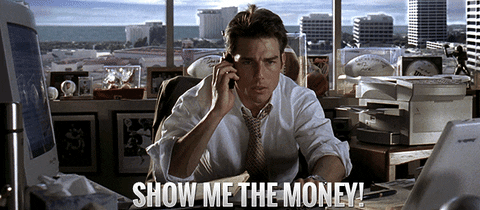
### (And hopefully it's all green like MONEY!)
<li>w
    <li>w
        <li>w
            <li>w

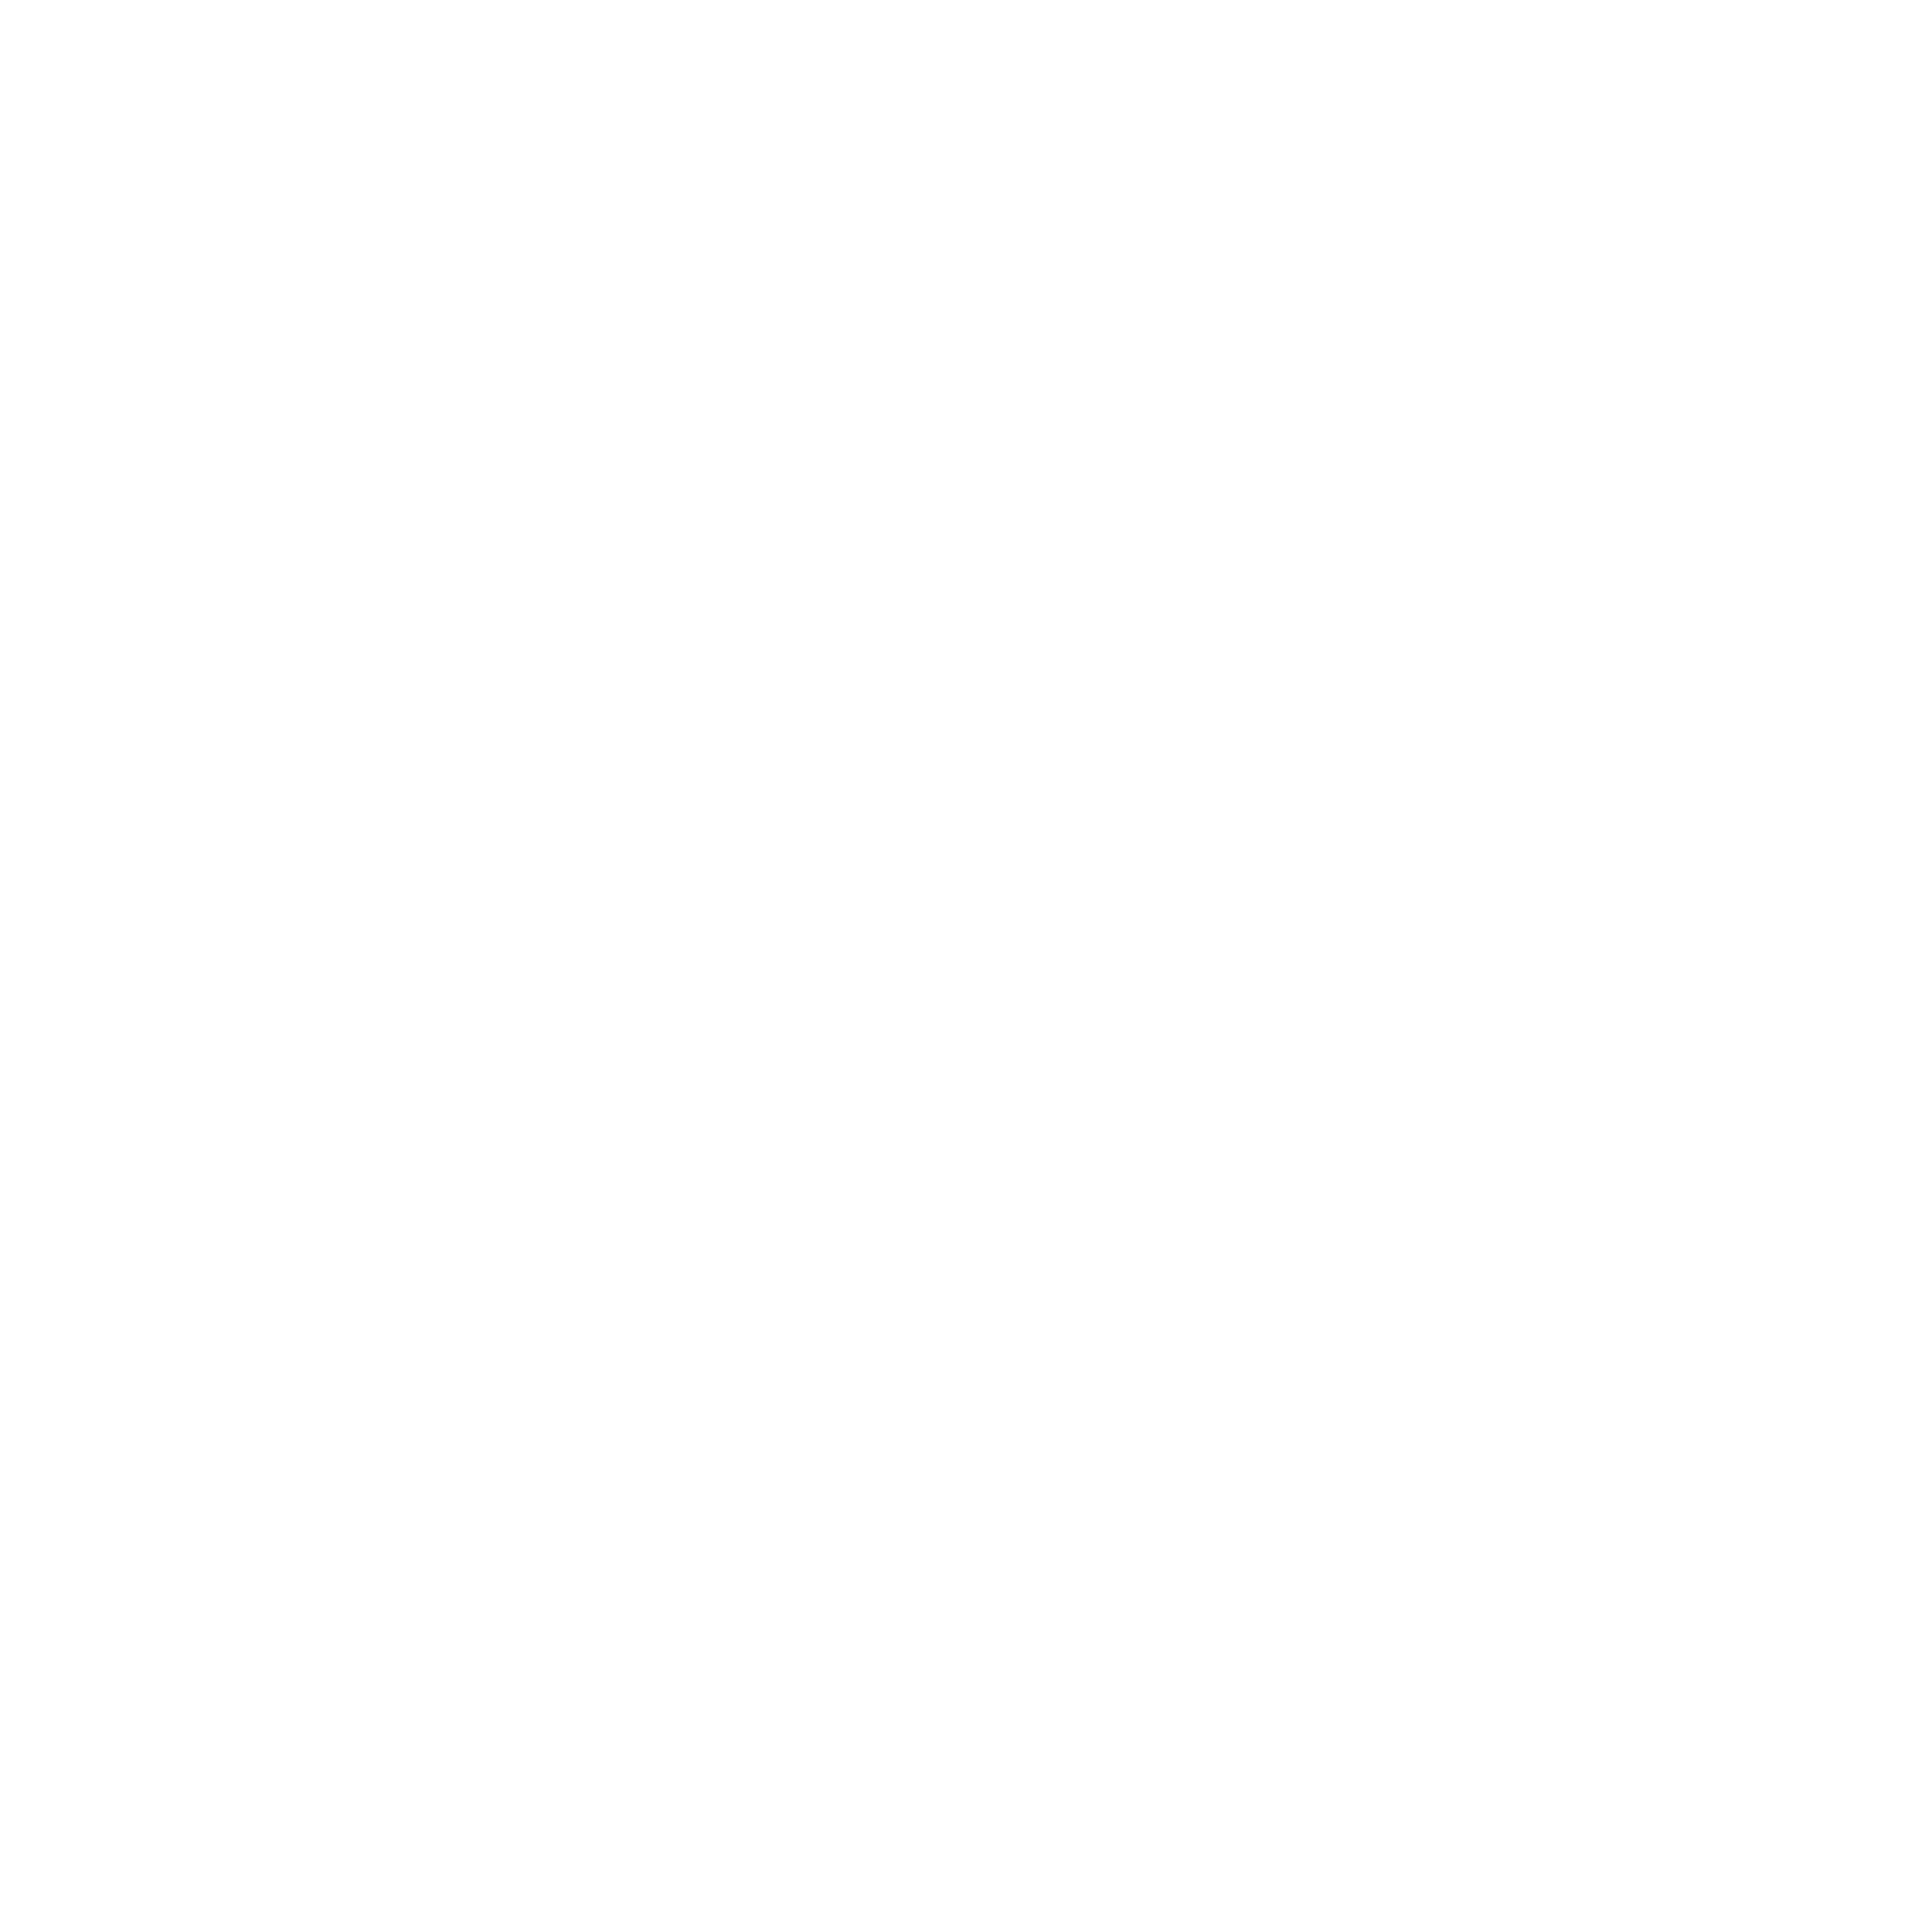

In [52]:
# "Show. me. the mappy"!
smap = gj.Map(height=5000, width=5000)
smappy = smap.run("d.vect", map="sampmap", display="shape", type="point", color="none", fill_color="none", width="1", icon="basic/circle", size="4")
#smap.save(filename="sampmap.png")
#smap.save(filename="sampmap.shp")
smap.show()

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

In [ ]:
# Set computational region to this new dataset
#gs.run_command("g.region", vector="ex1_map")

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

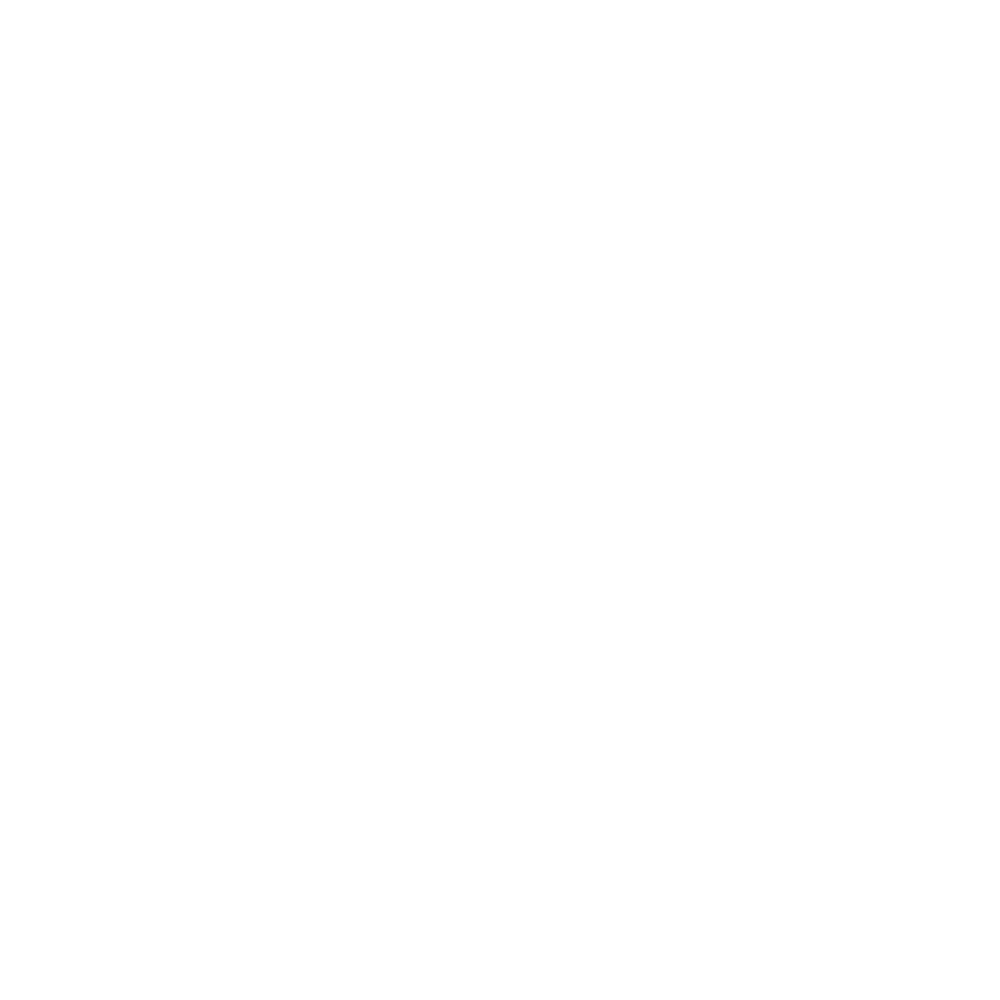

In [47]:
# Create detail/zoomed in map view
detail_smap = gj.Map(height=1000, width=1000)

detail_smap.run("d.vect", map="sampmap", 
               type="point", color="none", 
               fill_color="none", width="1", 
               icon="basic/circle", size="5")
detail_smap.show()

In [ ]:
detail_smap.save(filename="detailmap.png")
detail_smap.save(filename="detailmap.shp")

------------------

# View attribute table to scrutinize data quality

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

In [ ]:
from grass.script import vector
vector.vector_db(map="ex1_map")


#from grass.pygrass.vector import VectorTopo
#somename = VectorTopo('ex1_map')
#somename.open(mode-'r')
#dblinks = DBlinks(somename.c_mapinfo)
#dblinks
#DBlinks([Link(1, mapname, sqlite)])
#link = DBlinks[0]
#Link(1, mapname, sqliteabs)
#table = link.table()

##Here, DBlinks is a class that contains all the links of a vector map. 
##Each link is also a class (Link) that contains a specific link’s parameters. 
##The table() method of the link class return the linked table as a table object (Table).

# Clean up table

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

In [ ]:
# Edit attributes
gs.run_command("v.db.droprow", 
               input="ex1_map", 
               where="Speed = 0 OR Dry_Yield = 0", 
               output="NoZerosAllHeros")

In [ ]:
detail_map.show()

# Reload color for clean map

<span style="font-family:Dubai; color:#555555; font-size:17px;">

Words go here that explain the code below.
WORDS GO HERE THAT EXPLAIN THE CODE BELOW

In [ ]:
gs.run_command("d.vect", 
               flags="i", map="NoZerosAllHeros", 
               type="point", color="none", 
               fill_color="none", width="1", 
               icon="basic/circle", size="5")

In [ ]:
detail_map = gj.Map(height=700, width=700)
detail_map.run("d.vect", map="NoZerosAllHeros", 
               type="point", color="none", 
               fill_color="none", width="1", 
               icon="basic/circle", size="5")
detail_map.show()